In [2]:
import os
import sys
sys.path.append(os.path.join(os.getcwd(), "../lib"))

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy import sparse
# import seaborn as sns
# sns.set_style('whitegrid')

from numpy.linalg import norm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from model.source_identify_model import SourceIdentifyModel

from copy import deepcopy
from collections import OrderedDict
import time

# magics
%matplotlib inline
# %load_ext autoreload
# %autoreload 2

# configuaration
task_name = "SyntheticExperiments"
output_folder = '../data/output/%s' % task_name
figure_folder = '../figures/%s' % task_name

# Effect of sample size

In this part, we shall test how sample size affects model's performance, including:
1. Running time
2. accuracy for recovering influential matrix
3. accuracy for recovering tweet word distribution
3. accuracy for recovering news word distribution
4. accuracy for recovering sample roots

In [1]:
def build_args():
    from collections import namedtuple    
    args = namedtuple

## generate sample events of different sizes

## fitting the parameters

## evaluate rooted probability

In [379]:
# evaluating the rooted proba
df['root_sample'] = None
df['rooted_proba_true'] = None
df['rooted_proba_fitted'] = None

for index, events, parents, new_model in df[['events', 'parents', 'model']].itertuples():
    print "evaluating rooted probability with %d events..." % len(events)
    df.set_value(index, 'root_sample', new_model.eval_roots((e[1] for e in events), parents))
    
    # using the groundtruth model
    %time rooted_proba = model0.eval_rooted_proba(events)    
    df.set_value(index, 'rooted_proba_true', rooted_proba)    
    
    # using the fitted model
    %time rooted_proba = new_model.eval_rooted_proba(events)    
    df.set_value(index, 'rooted_proba_fitted', rooted_proba)        

evaluating rooted probability with 490 events...
CPU times: user 10.2 s, sys: 152 ms, total: 10.4 s
Wall time: 10.3 s
CPU times: user 10.3 s, sys: 3.99 ms, total: 10.3 s
Wall time: 10.3 s
evaluating rooted probability with 990 events...
CPU times: user 22.5 s, sys: 0 ns, total: 22.5 s
Wall time: 22.5 s
CPU times: user 22.5 s, sys: 0 ns, total: 22.5 s
Wall time: 22.5 s
evaluating rooted probability with 1989 events...
CPU times: user 45.5 s, sys: 7.99 ms, total: 45.5 s
Wall time: 45.5 s
CPU times: user 45.2 s, sys: 16 ms, total: 45.2 s
Wall time: 45.2 s
evaluating rooted probability with 5334 events...
CPU times: user 2min 25s, sys: 64 ms, total: 2min 25s
Wall time: 2min 25s
CPU times: user 2min 24s, sys: 52 ms, total: 2min 24s
Wall time: 2min 24s
evaluating rooted probability with 10477 events...
CPU times: user 5min 50s, sys: 220 ms, total: 5min 50s
Wall time: 5min 50s
CPU times: user 5min 49s, sys: 100 ms, total: 5min 49s
Wall time: 5min 49s


In [380]:
df.to_pickle('%s/rp-fitted.pkl' % output_folder)

# Compare root recovery to other baselines

In this section, we shall compare root recovery between different methods. The baseline include:
1. rooted probability with temporal only
2. rooted probability with mark only
3. naive classifier with root label for some proportion of events

In [199]:
df_cmp = pd.DataFrame(columns=['n_events', 'method', 'root_pred'])

df_temp = pd.DataFrame(columns=df_cmp.columns)
df_temp['n_events'] = df['n_events']
df_temp['root_pred'] = np.argmax(df['rooted_proba_true'], axis=1)
df_temp['method'] = 'rooted_proba_true'
df_cmp = df_cmp.append(df_temp)

df_temp = pd.DataFrame(columns=df_cmp.columns)
df_temp['n_events'] = df['n_events']
df_temp['root_pred'] = np.argmax(df['rooted_proba_fitted'], axis=1)
df_temp['method'] = 'rooted_proba_fitted'
df_cmp = df_cmp.append(df_temp)

df_cmp.index = range(len(df_cmp))
df_cmp

n_events               method  \
0     490.0    rooted_proba_true   
1     990.0    rooted_proba_true   
2    1989.0    rooted_proba_true   
3    5334.0    rooted_proba_true   
4   10477.0    rooted_proba_true   
5     490.0  rooted_proba_fitted   
6     990.0  rooted_proba_fitted   
7    1989.0  rooted_proba_fitted   
8    5334.0  rooted_proba_fitted   
9   10477.0  rooted_proba_fitted   

                                           root_pred  
0  [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...  
1  [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...  
2  [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...  
3  [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...  
4  [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...  
5  [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...  
6  [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...  
7  [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...  
8  [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...  
9  [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...

In [230]:
df_cmp = df_cmp[['n_events', 'method', 'root_pred']]

In [231]:
for index, events, model in df[['events', 'model']].itertuples():
    n_events = len(events)
    # define all methods
    methods = [
        ('rooted_proba_true', lambda data: np.argmax(model0.eval_rooted_proba(data), axis=1)),
        ('rooted_proba_fitted', lambda data: np.argmax(model.eval_rooted_proba(data), axis=1)),
        ('rooted_proba_temp_only_true', lambda data: np.argmax(model0.eval_rooted_proba(data, include_time=True, include_mark=False), axis=1)),
        ('rooted_proba_temp_only_fitted', lambda data: np.argmax(model.eval_rooted_proba(data, include_time=True, include_mark=False), axis=1)),
        ('rooted_proba_mark_only_true', lambda data: np.argmax(model0.eval_rooted_proba(data, include_time=False, include_mark=True), axis=1)),
        ('rooted_proba_mark_only_fitted', lambda data: np.argmax(model.eval_rooted_proba(data, include_time=False, include_mark=True), axis=1)),
    ]
    
    for method_name, method in methods:
        print "predicting with n_events=%d and method=%s..." % (n_events, method_name)
        if len(df_cmp.query('n_events==%d and method=="%s"' %(n_events, method_name))) == 0:
            %time df_cmp.loc[len(df_cmp)] = n_events, method_name, method(events)           


predicting with n_events=490 and method=rooted_proba_true...
predicting with n_events=490 and method=rooted_proba_fitted...
predicting with n_events=490 and method=rooted_proba_temp_only_true...
predicting with n_events=490 and method=rooted_proba_temp_only_fitted...
predicting with n_events=490 and method=rooted_proba_mark_only_true...
CPU times: user 38.7 s, sys: 80 ms, total: 38.8 s
Wall time: 38.7 s
predicting with n_events=490 and method=rooted_proba_mark_only_fitted...
CPU times: user 38.5 s, sys: 87.9 ms, total: 38.6 s
Wall time: 38.6 s
predicting with n_events=990 and method=rooted_proba_true...
predicting with n_events=990 and method=rooted_proba_fitted...
predicting with n_events=990 and method=rooted_proba_temp_only_true...
predicting with n_events=990 and method=rooted_proba_temp_only_fitted...
predicting with n_events=990 and method=rooted_proba_mark_only_true...
CPU times: user 2min 39s, sys: 212 ms, total: 2min 39s
Wall time: 2min 39s
predicting with n_events=990 and met

/afs/cs.wisc.edu/u/z/h/zhangwei/workspace/hawkes-rooted-probability/src/source_identify_model.py:294: RuntimeWarning: divide by zero encountered in log
  log(self.kernel.eval(te - tee)))


CPU times: user 1h 18min 24s, sys: 3.08 s, total: 1h 18min 27s
Wall time: 1h 18min 26s
predicting with n_events=5334 and method=rooted_proba_mark_only_fitted...
CPU times: user 1h 17min 52s, sys: 3.03 s, total: 1h 17min 55s
Wall time: 1h 17min 53s
predicting with n_events=10477 and method=rooted_proba_true...
predicting with n_events=10477 and method=rooted_proba_fitted...
predicting with n_events=10477 and method=rooted_proba_temp_only_true...
predicting with n_events=10477 and method=rooted_proba_temp_only_fitted...
predicting with n_events=10477 and method=rooted_proba_mark_only_true...
CPU times: user 5h 6min 26s, sys: 12 s, total: 5h 6min 38s
Wall time: 5h 6min 32s
predicting with n_events=10477 and method=rooted_proba_mark_only_fitted...


KeyboardInterrupt: 

Naive Bayesian classifier with different proportion of known sample roots

In [280]:
from sklearn.naive_bayes import MultinomialNB

In [294]:
df_cmp = df_cmp[~df_cmp.method.str.contains("NB")]

In [298]:
for index, events, root_sample in df[['events', 'root_sample']].itertuples():
    n_events = len(events)
    X = sparse.vstack([e[2] for e in events])
    y = np.array(root_sample)
    for train_ratio in [0.1, 0.3, 0.5, 0.7]:
        method_name = 'NB_%.1f' % train_ratio
        print "predicting with n_events=%d and method=%s..." % (n_events, method_name)
        if len(df_cmp.query('n_events==%d and method=="%s"' %(n_events, method_name))) > 0:
            continue
        
        train_index, test_index, _, _= train_test_split(range(X.shape[0]), y, train_size=train_ratio)        
        clf = MultinomialNB().fit(X[train_index], y[train_index])      
        y_pred = np.nan * np.ones_like(y)
        y_pred[test_index] = clf.predict(X[test_index])
        df_cmp.loc[len(df_cmp)] = n_events, method_name, y_pred

predicting with n_events=490 and method=NB_0.1...


/afs/cs.wisc.edu/u/z/h/zhangwei/.local/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


predicting with n_events=490 and method=NB_0.3...
predicting with n_events=490 and method=NB_0.5...
predicting with n_events=490 and method=NB_0.7...
predicting with n_events=990 and method=NB_0.1...
predicting with n_events=990 and method=NB_0.3...
predicting with n_events=990 and method=NB_0.5...
predicting with n_events=990 and method=NB_0.7...
predicting with n_events=1989 and method=NB_0.1...
predicting with n_events=1989 and method=NB_0.3...
predicting with n_events=1989 and method=NB_0.5...
predicting with n_events=1989 and method=NB_0.7...
predicting with n_events=5334 and method=NB_0.1...
predicting with n_events=5334 and method=NB_0.3...
predicting with n_events=5334 and method=NB_0.5...
predicting with n_events=5334 and method=NB_0.7...
predicting with n_events=10477 and method=NB_0.1...
predicting with n_events=10477 and method=NB_0.3...
predicting with n_events=10477 and method=NB_0.5...
predicting with n_events=10477 and method=NB_0.7...


In [299]:
df_cmp

n_events                         method  \
0      490.0              rooted_proba_true   
1      490.0            rooted_proba_fitted   
2      490.0  rooted_proba_temp_only_fitted   
3      490.0    rooted_proba_temp_only_true   
4      990.0              rooted_proba_true   
5      990.0            rooted_proba_fitted   
6      990.0    rooted_proba_temp_only_true   
7      990.0  rooted_proba_temp_only_fitted   
8     1989.0              rooted_proba_true   
9     1989.0            rooted_proba_fitted   
10    1989.0    rooted_proba_temp_only_true   
11    1989.0  rooted_proba_temp_only_fitted   
12    5334.0              rooted_proba_true   
13    5334.0            rooted_proba_fitted   
14    5334.0    rooted_proba_temp_only_true   
15    5334.0  rooted_proba_temp_only_fitted   
16   10477.0              rooted_proba_true   
17   10477.0            rooted_proba_fitted   
18   10477.0    rooted_proba_temp_only_true   
19   10477.0  rooted_proba_temp_only_fitted   
20     490.0    rooted_proba_mark_only_true   
21     490.0  rooted_proba_mark_only_fitted   
22     990.0    rooted_proba_mark_only_true   
23     990.0  rooted_proba_mark_only_fitted   
24    1989.0    rooted_proba_mark_only_true   
25    1989.0  rooted_proba_mark_only_fitted   
26    5334.0    rooted_proba_mark_only_true   
27    5334.0  rooted_proba_mark_only_fitted   
28   10477.0    rooted_proba_mark_only_true   
29     490.0                         NB_0.1   
30     490.0                         NB_0.3   
31     490.0                         NB_0.5   
32     490.0                         NB_0.7   
33     990.0                         NB_0.1   
34     990.0                         NB_0.3   
35     990.0                         NB_0.5   
36     990.0                         NB_0.7   
37    1989.0                         NB_0.1   
38    1989.0                         NB_0.3   
39    1989.0                         NB_0.5   
40    1989.0                         NB_0.7   
41    5334.0                         NB_0.1   
42    5334.0                         NB_0.3   
43    5334.0                         NB_0.5   
44    5334.0                         NB_0.7   
45   10477.0                         NB_0.1   
46   10477.0                         NB_0.3   
47   10477.0                         NB_0.5   
48   10477.0                         NB_0.7   

                                            root_pred  
0   [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...  
1   [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...  
2   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
3   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
4   [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...  
5   [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...  
6   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
7   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
8   [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...  
9   [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...  
10  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
11  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
12  [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...  
13  [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...  
14  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
15  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
16  [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...  
17  [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...  
18  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
19  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
20  [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...  
21  [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...  
22  [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...  
23  [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...  
24  [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...  
25  [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...  
26  [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...  
27  [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...  
28  [0, 1, 0, 1, 0, 0, 0, 0, 

In [310]:
output_folder

'../data/output/SyntheticExperiments'

In [311]:
df_cmp.to_pickle('%s/compare.pkl' % output_folder)

# Analyze results

In [2]:
df = pd.read_pickle('%s/rp-fitted.pkl' % output_folder)
df_cmp = pd.read_pickle('%s/compare.pkl' % output_folder)

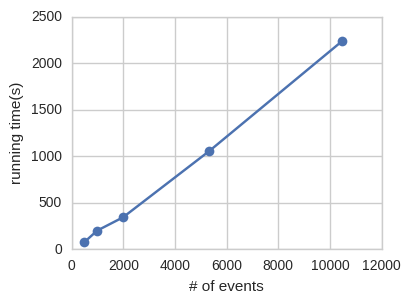

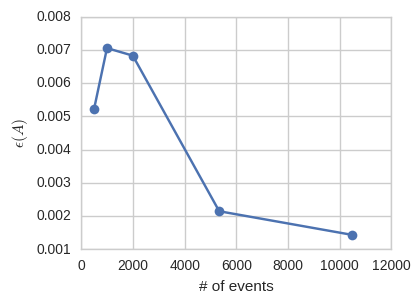

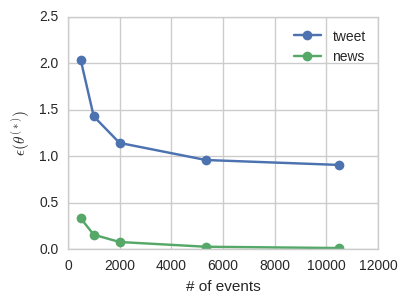

In [7]:
# evaluating the recovered parameter
df['infl_mat_err'] = None
df['tweet_dist_err'] = None
df['news_dist_err'] = None
for index, new_model in df[['model']].itertuples():    
    
    infl_mat_err = (norm(new_model.influential_matrix - model0.influential_matrix, 'fro') ** 2 / 
                    norm(model0.influential_matrix, 'fro') ** 2)
    tweet_dist_err = (norm(new_model.mark_density.feature_probs[0] - model0.mark_density.feature_probs[0]) ** 2 / 
                      norm(model0.mark_density.feature_probs[0]) ** 2)
    news_dist_err = (norm(new_model.mark_density.feature_probs[1] - model0.mark_density.feature_probs[1]) ** 2 / 
                      norm(model0.mark_density.feature_probs[1]) ** 2)
    
    df.loc[index, ['infl_mat_err', 'tweet_dist_err', 'news_dist_err']] = infl_mat_err, tweet_dist_err, news_dist_err

plt.figure(figsize=(4,3))
plt.plot(df.n_events, df.running_time, 'o-')
plt.xlabel('# of events')
plt.ylabel('running time(s)')
plt.savefig('%s/running-time.eps' % figure_folder)

plt.figure(figsize=(4,3))
plt.plot(df.n_events, df.infl_mat_err, 'o-')
plt.xlabel('# of events')
plt.ylabel(r'$\epsilon(A)$')
plt.savefig('%s/param-acc-A.eps' % figure_folder)

plt.figure(figsize=(4,3))
plt.plot(df.n_events, df.tweet_dist_err, 'o-', label='tweet')
plt.plot(df.n_events, df.news_dist_err, 'o-', label='news')
plt.xlabel('# of events')
plt.ylabel(r'$\epsilon(\theta^{(*)})$')
plt.legend()
plt.savefig('%s/param-acc-theta.eps' % figure_folder)

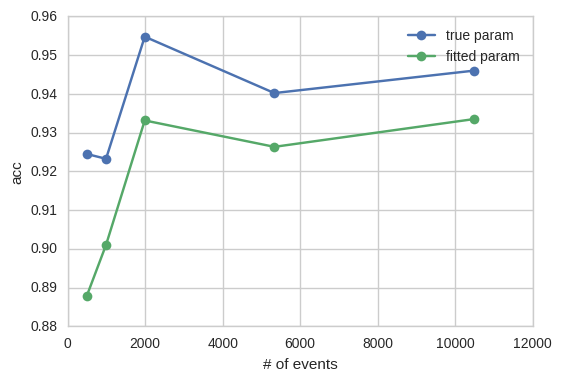

In [273]:
df['root_acc_true'] = None
df['root_acc_fitted'] = None
for index, root_sample, root_pred_true, root_pred_fitted in \
        df[['root_sample', 'root_pred_true', 'root_pred_fitted']].itertuples():
    df.set_value(index, 'root_acc_true', accuracy_score(root_sample, root_pred_true))
    df.set_value(index, 'root_acc_fitted', accuracy_score(root_sample, root_pred_fitted))

plt.figure(figsize=(4,3))
plt.plot(df.n_events, df.root_acc_true, 'o-', label='true param')
plt.plot(df.n_events, df.root_acc_fitted, 'o-', label='fitted param')
plt.xlabel('# of events')
plt.ylabel('acc')
plt.legend()

In [9]:
t = df_cmp.merge(df[['n_events', 'root_sample']], on='n_events')
t['acc'] = t[['root_sample', 'root_pred']].apply(lambda row: accuracy_score(np.array(row[0])[~np.isnan(row[1])], np.array(row[1])[~np.isnan(row[1])]), axis=1)

In [19]:
lgd.get_texts()

<a list of 10 Text objects>

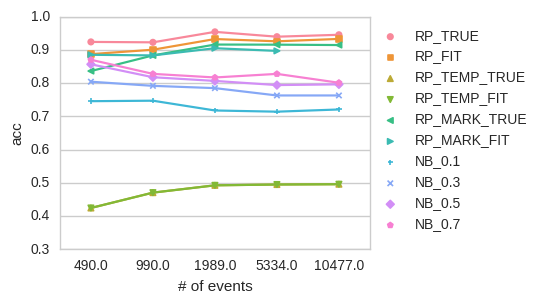

In [25]:
plt.figure(figsize=(4,3))
sns.pointplot(x='n_events', y='acc', hue='method', data=t, 
              markers=list('os^v<>+xDp'), 
              scale=0.5, legend=False)
plt.xlabel('# of events')
plt.ylabel('acc')
lgd = plt.legend(bbox_to_anchor=(1.55, 1))
# change text
lgd.get_texts()[0].set_text('RP_TRUE')
lgd.get_texts()[1].set_text('RP_FIT')
lgd.get_texts()[2].set_text('RP_TEMP_TRUE')
lgd.get_texts()[3].set_text('RP_TEMP_FIT')
lgd.get_texts()[4].set_text('RP_MARK_TRUE')
lgd.get_texts()[5].set_text('RP_MARK_FIT')

plt.savefig('%s/root-acc.eps' % figure_folder, bbox_extra_artists=(lgd,), bbox_inches='tight')

In [289]:
accuracy_score([1, 1, 0], [None, 1, 0])

ValueError: Can't handle mix of binary and unknown